<a href="https://colab.research.google.com/github/Zia-Ul-Hasan/Dip-Lab/blob/main/lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

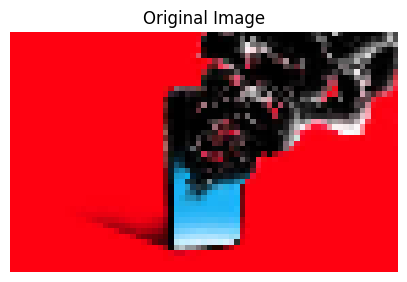

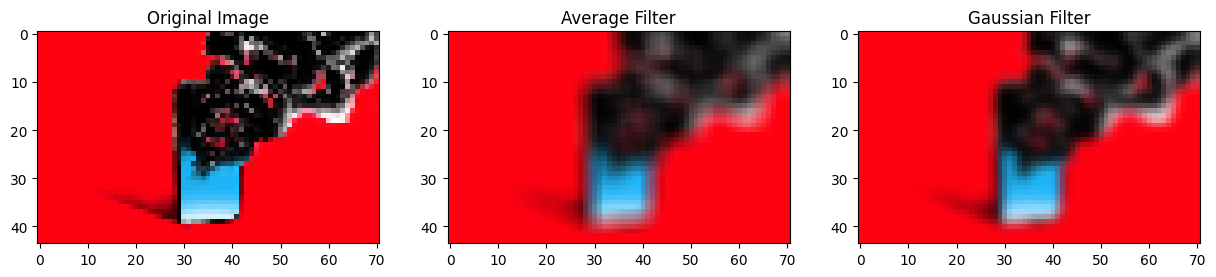

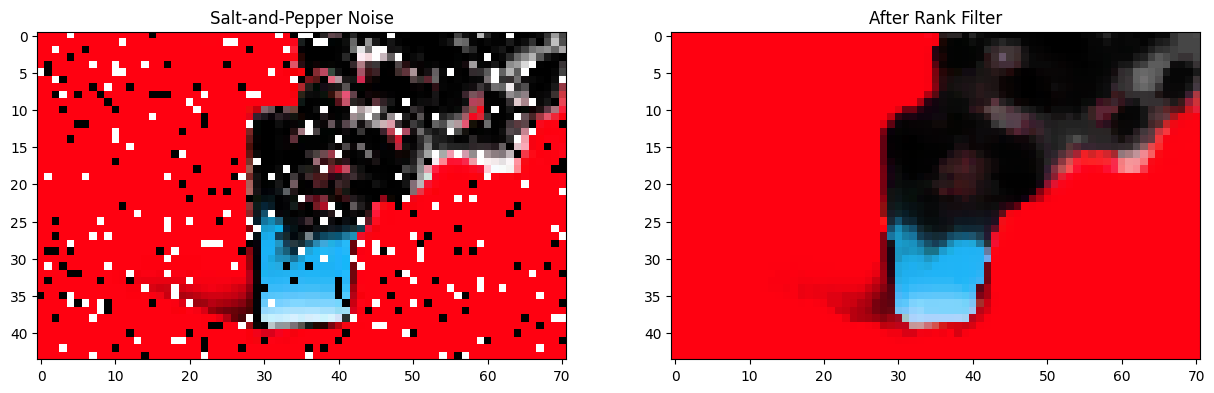

<ipython-input-1-cc68e06976ba>:71: RuntimeWarning: overflow encountered in scalar add
  vertical = img_gray[x + 1, y] + img_gray[x - 1, y] - 2 * img_gray[x, y]
<ipython-input-1-cc68e06976ba>:72: RuntimeWarning: overflow encountered in scalar add
  horizontal = img_gray[x, y + 1] + img_gray[x, y - 1] - 2 * img_gray[x, y]


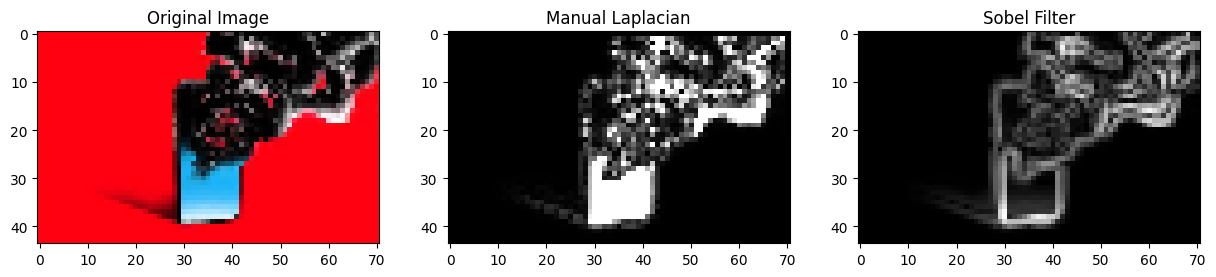

In [ ]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

uploaded_img = cv2.imread('/content/images.png')
img = cv2.resize(uploaded_img, (0, 0), fx=0.25, fy=0.25)


plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()


# Task 1: Average and Gaussian Filters


avg_kernel = np.ones((5, 5), np.float32) / 25
average_filter = cv2.filter2D(img, -1, avg_kernel)

# Gaussian Filter (5x5)
gaussian_filter = cv2.GaussianBlur(img, (5, 5), 0)
plt.figure(figsize=(15, 10))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(132), plt.imshow(cv2.cvtColor(average_filter, cv2.COLOR_BGR2RGB)), plt.title("Average Filter")
plt.subplot(133), plt.imshow(cv2.cvtColor(gaussian_filter, cv2.COLOR_BGR2RGB)), plt.title("Gaussian Filter")
plt.show()

# Task 2: Rank Filter

def add_salt_and_pepper(img, salt_prob, pepper_prob):
    noisy = img.copy()
    total_pixels = img.size
    num_salt = int(salt_prob * total_pixels)
    num_pepper = int(pepper_prob * total_pixels)

    for _ in range(num_salt):
        x, y = np.random.randint(0, img.shape[0]), np.random.randint(0, img.shape[1])
        noisy[x, y] = 255

    for _ in range(num_pepper):
        x, y = np.random.randint(0, img.shape[0]), np.random.randint(0, img.shape[1])
        noisy[x, y] = 0

    return noisy

noisy_img = add_salt_and_pepper(img, salt_prob=0.02, pepper_prob=0.02)

rank_filter = cv2.medianBlur(noisy_img, 5)

plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)), plt.title("Salt-and-Pepper Noise")
plt.subplot(122), plt.imshow(cv2.cvtColor(rank_filter, cv2.COLOR_BGR2RGB)), plt.title("After Rank Filter")
plt.show()

#         - If rank = 1 (Min Filter), noise will **increase**.
#         - If rank = 25 (Max Filter), noise will **increase**.



# Task 3: Laplacian (Manual and Sobel)

def mylaplacian(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h, w = img_gray.shape
    laplacian = np.zeros_like(img_gray, dtype=np.float32)

    for x in range(1, h - 1):
        for y in range(1, w - 1):
            vertical = img_gray[x + 1, y] + img_gray[x - 1, y] - 2 * img_gray[x, y]
            horizontal = img_gray[x, y + 1] + img_gray[x, y - 1] - 2 * img_gray[x, y]
            laplacian[x, y] = vertical + horizontal

    return cv2.convertScaleAbs(laplacian)

manual_laplacian = mylaplacian(img)

sobel_x = cv2.Sobel(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)

plt.figure(figsize=(15, 10))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(132), plt.imshow(manual_laplacian, cmap='gray'), plt.title("Manual Laplacian")
plt.subplot(133), plt.imshow(sobel, cmap='gray'), plt.title("Sobel Filter")
plt.show()

# - Sobel Filter provides smoother edge detection with directional edges (horizontal or vertical).
# - Manual Laplacian captures second-order derivatives and is sensitive to noise.
